<a href="https://colab.research.google.com/github/ConfusedTraveler/credit-card-fraud-detect/blob/main/credit_card_fraud_detection_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Related Libraries and Settings

In [1]:
import numpy as np
import scipy as sp
from  scipy.stats import boxcox
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

# Exploratory Data Analysis

to get an general understanding of the data and its underlying structure

In [2]:
# 导入数据
transactions = pd.read_csv('/content/drive/MyDrive/credit_card_fraud_detection/data/creditcard.csv')

In [ ]:
transactions.shape

(284807, 31)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

没有缺失值，都是数值特征

In [ ]:
# Does dataset has duplicates?

In [ ]:
transactions.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
171694,120773.0,-2.032271,-2.327549,-0.541162,-1.960303,1.346147,-2.103816,-0.648890,0.348502,-1.405983,-0.285962,0.423801,0.633656,0.270006,0.939499,-0.261129,-1.375096,-0.226125,1.372256,-0.217140,0.208691,-0.176309,-1.173100,0.086868,-0.399973,-0.034010,0.446630,-0.184358,-0.485799,70.00,0
18329,29391.0,0.635921,-1.610698,0.359508,-1.255057,-1.276377,0.158189,-0.494621,0.199723,1.741064,-1.157040,1.143339,1.141118,-0.438062,0.137837,0.998973,-0.360202,-0.132298,0.469608,0.638873,0.479833,0.345010,0.566226,-0.383263,-0.219055,0.301274,0.116559,-0.001501,0.057066,300.00,0
225324,144203.0,1.733527,0.192115,-0.596588,3.655108,0.380741,0.597431,-0.042081,0.181358,-0.979216,1.579108,0.409305,0.134631,-0.692110,0.471519,-1.253546,1.091002,-0.973255,0.098173,-1.336327,-0.158009,0.078344,0.017352,0.201248,0.645393,-0.210942,-0.154591,-0.046805,-0.034900,75.66,0
188136,127833.0,-0.547318,0.358981,0.347084,-0.523232,1.944033,4.610052,-0.790194,1.284724,0.688283,-0.005594,-0.478102,-0.032214,0.006629,-0.356095,1.050653,0.425499,-0.914551,0.702879,-0.657971,0.023634,0.359793,1.163048,0.053820,0.688311,-0.954145,-0.631148,0.343650,0.314031,27.96,0
23702,32874.0,1.262292,-0.467867,0.032072,-0.340923,-0.886434,-1.042372,-0.332843,-0.247977,-0.722160,0.076317,-0.048070,-0.290112,0.638783,-1.460332,0.004926,1.091970,1.275225,-1.309882,0.644002,0.260429,-0.034438,-0.195649,-0.076630,0.337928,0.473337,-0.310184,0.013439,0.050809,77.88,0


In [ ]:
print('Number of legitimate transactions:',transactions['Class'].value_counts()[0])
print('Number of fraudulent transactions:',transactions['Class'].value_counts()[1])
print('Legitimate transactions:',round(transactions['Class'].value_counts()[0]/len(transactions)*100,3),'% of the dataset')
print('Fraudulent transactions:',round(transactions['Class'].value_counts()[1]/len(transactions)*100,3),'% of the dataset')

Number of legitimate transactions: 284315
Number of fraudulent transactions: 492
Legitimate transactions: 99.827 % of the dataset
Fraudulent transactions: 0.173 % of the dataset


In [ ]:
# Picture: Volume of legitimate transactions and fraudulent transactions

In [ ]:
# Picture: Value of legitimate transactions and fraudulent transactions

# Data Preparation

## feature engineering
* 处理time和amount这两个特征，其他特征已经使用PCA处理过


In [3]:
transactions['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [4]:
transactions['Time'] = transactions['Time'] / 3600

In [5]:
transactions['Time'].describe()

count    284807.000000
mean         26.337183
std          13.191152
min           0.000000
25%          15.055972
50%          23.525556
75%          38.700139
max          47.997778
Name: Time, dtype: float64

plot a histogram of transaction times, with one bin per hour

Text(0.5, 1.0, 'Transaction Times')

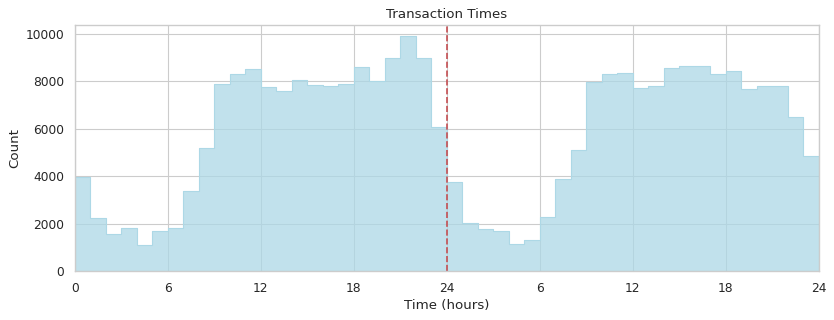

In [6]:
# picture: time分布
plt.figure(figsize=(12,4), dpi=80)
sns.histplot(transactions['Time'], bins=48, element='step', color='lightblue')
plt.xlim([0,48])
plt.xticks(np.arange(0,49,6), np.hstack((np.arange(0, 30, 6), np.arange(6, 30, 6))).astype(str))
plt.axvline(x=24, color='r', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Transaction Times')

In [7]:
transactions['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

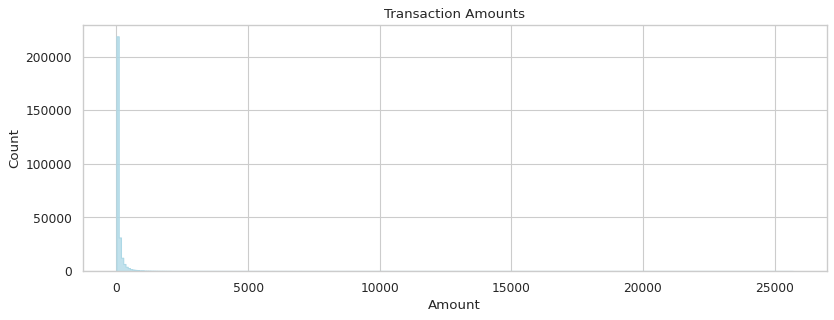

In [8]:
# picture: amount分布
plt.figure(figsize=(12,4), dpi=80)
sns.histplot(transactions['Amount'], bins=300, element='step', color='lightblue')
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

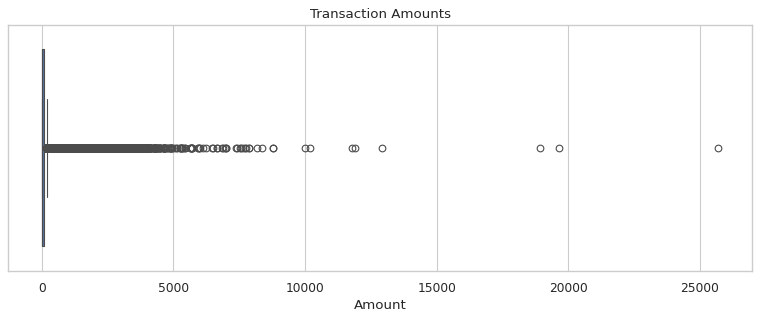

In [9]:
# The histogram is hard to read due to some outliers we can't see. A boxplot will show the outliers.
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x=transactions['Amount'])
plt.title('Transaction Amounts')

We can see there are no outliers on the left and many outliers on the right.So the amounts certainly seem right-skewed.

In [10]:
transactions['Amount'].skew()

16.977724453761024

amount最小值是0

In [11]:
transactions['Amount'] = transactions['Amount'] + 1e-9

In [12]:
transactions['Amount'], maxlog, (min_ci,max_ci) = boxcox(transactions['Amount'], alpha=0.01)

In [13]:
maxlog

0.13392240552999146

In [14]:
(min_ci,max_ci)

(0.132621597858576, 0.13523057944346129)

Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

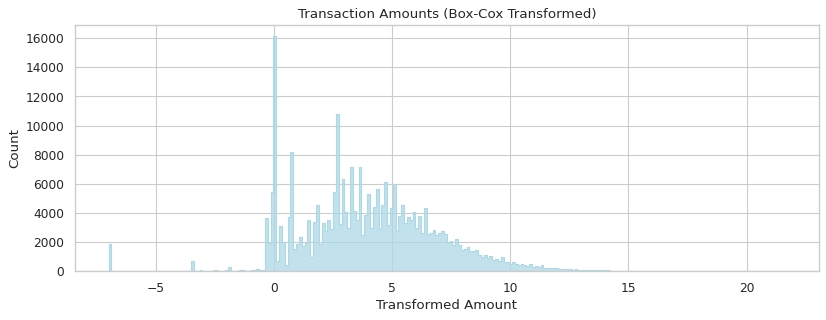

In [15]:
# picture: transformed amount分布
plt.figure(figsize=(12,4), dpi=80)
sns.histplot(transactions['Amount'], element='step', color='lightblue')
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [16]:
transactions['Amount'].describe()

count    284807.000000
mean          3.977690
std           2.961936
min          -7.001590
25%           1.937710
50%           3.829056
75%           5.896318
max          21.621106
Name: Amount, dtype: float64

In [17]:
transactions['Amount'].skew()

0.1153579081322187

## feature selection

### heatmap

<Axes: title={'center': 'features correlation plot'}>

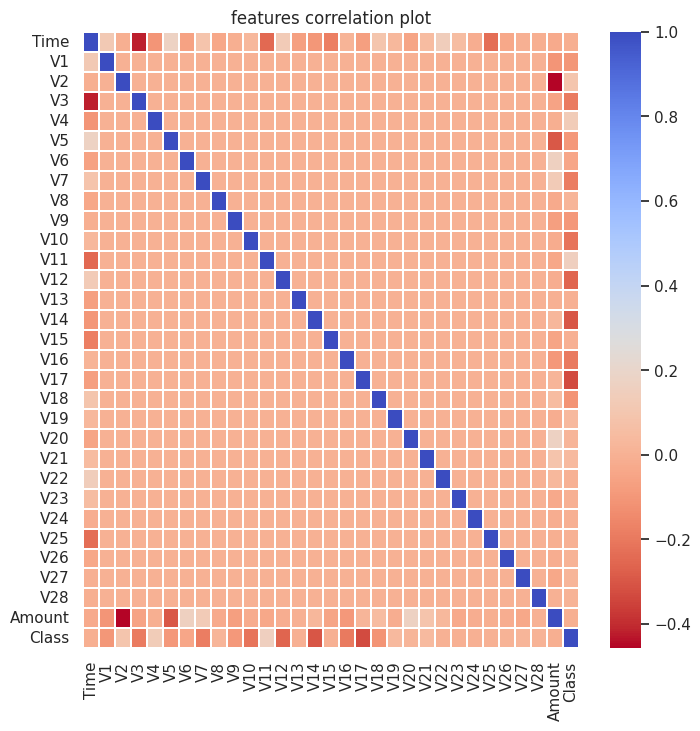

In [ ]:
plt.figure(figsize = (8,8))
plt.title('features correlation plot')
corr = transactions.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="coolwarm_r")

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (inverse correlation with V2 and V5).
但根据相关系数，各变量之间的相关性都不是特别强

In [ ]:
print(corr['Time'])

Time      1.000000
V1        0.117396
V2       -0.010593
V3       -0.419618
V4       -0.105260
V5        0.173072
V6       -0.063016
V7        0.084714
V8       -0.036949
V9       -0.008660
V10       0.030617
V11      -0.247689
V12       0.124348
V13      -0.065902
V14      -0.098757
V15      -0.183453
V16       0.011903
V17      -0.073297
V18       0.090438
V19       0.028975
V20      -0.050866
V21       0.044736
V22       0.144059
V23       0.051142
V24      -0.016182
V25      -0.233083
V26      -0.041407
V27      -0.005135
V28      -0.009413
Amount   -0.024570
Class    -0.012323
Name: Time, dtype: float64


In [ ]:
print(corr['Amount'])

Time     -0.024570
V1       -0.107079
V2       -0.457156
V3       -0.054582
V4       -0.012634
V5       -0.293445
V6        0.162356
V7        0.124091
V8       -0.027455
V9       -0.075074
V10      -0.023171
V11      -0.039688
V12      -0.013272
V13      -0.002986
V14       0.024897
V15      -0.050833
V16      -0.093714
V17       0.020111
V18       0.045358
V19      -0.015020
V20       0.164886
V21       0.085882
V22       0.028710
V23      -0.034159
V24      -0.013889
V25      -0.009619
V26      -0.018573
V27      -0.038343
V28       0.001622
Amount    1.000000
Class    -0.010656
Name: Amount, dtype: float64


In [ ]:
print(corr['Class'])

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount   -0.010656
Class     1.000000
Name: Class, dtype: float64


Class: inverse correlation with V14 and V17，但相关性也不是特别强

## train-test split

In [18]:
# train-test split
X = transactions.drop(columns='Class')
y = transactions['Class']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
del X, y

## class imbalance

In [ ]:
# class imbalance
from imblearn.combine import SMOTEENN

# 定义SMOTEENN对象
smote_enn = SMOTEENN(random_state=1)

# 应用SMOTEENN进行类别平衡
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# 现在X_resampled和y_resampled是平衡后的特征矩阵和标签向量

In [ ]:
# 计算重采样后各类别的数量
y_resampled.value_counts()

Class
1    199020
0    198597
Name: count, dtype: int64

# Model Selection, Data Modelling and Model Evaluation

计算 Recall Precision F1-Score MCC AUC-PR

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

## bagging

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier()
param_dist = {
    'n_estimators': [10,30,50,70],
    'max_samples': [0.1,0.4,0.7,1.0],
    'max_features': [0.1,0.4,0.7,1.0]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=BaggingClassifier(base_estimator),
    param_distributions=param_dist,
    n_iter=10,  # 这里设置了一个迭代次数，可以根据计算资源进行调整
    cv=3,        # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)

In [ ]:
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
random_search.best_params_

{'n_estimators': 50, 'max_samples': 1.0, 'max_features': 1.0}

In [ ]:
from sklearn.metrics import classification_report, matthews_corrcoef

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
y_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.84      0.88       148

    accuracy                           1.00     85443
   macro avg       0.96      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
mcc = matthews_corrcoef(y_test, y_pred)
print(mcc)

0.8841356206446525


Text(46.25, 0.5, 'True')

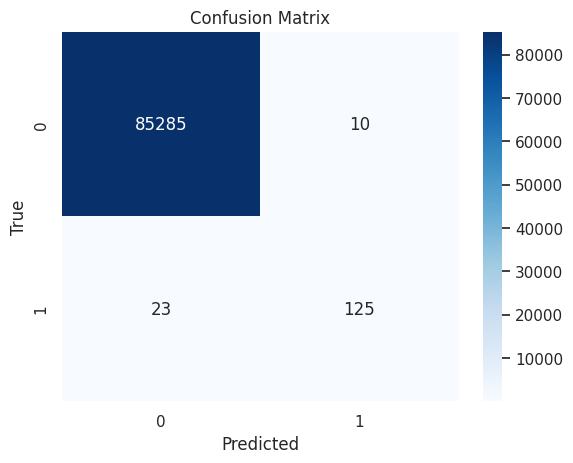

In [ ]:
# (a) 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
'''
# (b) 计算Precision-Recall AUC并绘制曲线
precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall (area = %0.2f)' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
'''

In [ ]:
# (c) 绘制特征重要性
feature_importances = best_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), indices=sorted_indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')

AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

In [ ]:
from joblib import dump, load

In [ ]:
dump(best_model, 'bagging.joblib')

['bagging.joblib']

In [ ]:
best_model = load('bagging.joblib')

## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 定义随机森林分类器的基础估计器
base_model = RandomForestClassifier()

# 定义参数的搜索空间，使用常用的离散值
param_dist = {
    'n_estimators': [10,30,50,70],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 创建RandomizedSearchCV实例
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=30,  # 可以根据您的计算资源调整迭代次数
    cv=5,  # 交叉验证的折数
    verbose=1,
    random_state=42,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)


## XGBoost

In [ ]:
# XGBoost

## LightGBM

In [ ]:
# LightGBM

## CatBoost

In [ ]:
# CatBoost

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.